# Data Question 2


## How is queue time impacted by RAM requested? How is it impacted by wall time requested?
Queue Time is difference between the submit time and the start time, so the amount of time spent in the queue before the job starts

## Are there any nodes that fail more than the other ones?
    Thoughts on why they fail

## Identify problematic users
Those people who submit greater than 500 jobs, with each less than 5 minutes within 4 hours

In [99]:
#import libraries 
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from datetime import datetime
import numpy as np
import seaborn as sns

%matplotlib inline
# Increasing default figure size of the notebook
plt.rcParams['figure.figsize'] = [12, 8]

## Reading in the data to a dataframe called accre_df

In [3]:
accre_df = pd.read_csv('Data/july-2017-thru-june-2018.txt', sep = '|')
accre_df.head()

/Users/andrewmarsee/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,JobID,JobIDRaw,Cluster,Partition,Account,Group,GID,User,UID,Submit,...,State,NNodes,NCPUS,ReqCPUS,ReqMem,ReqGRES,ReqTRES,Timelimit,NodeList,JobName
0,15806649,15806649,accre,production,h_vuiis,h_vuiis,36052,masispider,NaN,2017-07-02T00:40:58,...,COMPLETED,1,2,2,12Gn,NaN,"cpu=2,mem=12G,node=1",9-04:00:00,vmp1085,WOODWARD_TCP-x-228324-x-228324-x-301-x-Multi_A...
1,15806664,15806664,accre,production,h_vuiis,h_vuiis,36052,masispider,NaN,2017-07-02T00:40:58,...,COMPLETED,1,2,2,12Gn,NaN,"cpu=2,mem=12G,node=1",9-04:00:00,vmp1099,WOODWARD_TCP-x-115174-x-115174-x-301-x-Multi_A...
2,15806670,15806670,accre,production,h_vuiis,h_vuiis,36052,masispider,NaN,2017-07-02T00:40:58,...,COMPLETED,1,2,2,12Gn,NaN,"cpu=2,mem=12G,node=1",9-04:00:00,vmp1126,WOODWARD_TCP-x-215607-x-215607-x-301-x-Multi_A...
3,15806671,15806671,accre,production,h_vuiis,h_vuiis,36052,masispider,NaN,2017-07-02T00:40:58,...,COMPLETED,1,2,2,12Gn,NaN,"cpu=2,mem=12G,node=1",9-04:00:00,vmp230,WOODWARD_TCP-x-116214-x-116214-x-1701-x-Multi_...
4,15811617,15811617,accre,production,cms_samtest,cms_samtest,59297,uscms010,NaN,2017-07-01T05:00:00,...,COMPLETED,1,1,1,4000Mn,NaN,"cpu=1,mem=4000M,node=1",2-00:00:00,vmp1242,bl_aa7c22e04f21


In [4]:
accre_df.tail()

,JobID,JobIDRaw,Cluster,Partition,Account,Group,GID,User,UID,Submit,...,State,NNodes,NCPUS,ReqCPUS,ReqMem,ReqGRES,ReqTRES,Timelimit,NodeList,JobName
12499384,28331351,28331351,accre,production,cms_stage3,cms,31000,janjamrk,171357.0,2018-06-30T23:54:21,...,FAILED,1,1,1,4Gc,NaN,"cpu=1,mem=4G,node=1",01:00:00,vmp1314,2018-06-30-040817_6
12499385,28331352,28331352,accre,production,cms_stage3,cms,31000,janjamrk,171357.0,2018-06-30T23:54:22,...,FAILED,1,1,1,4Gc,NaN,"cpu=1,mem=4G,node=1",01:00:00,vmp1315,2018-06-30-040817_7
12499386,28331353,28331353,accre,production,cms_stage3,cms,31000,janjamrk,171357.0,2018-06-30T23:54:22,...,FAILED,1,1,1,4Gc,NaN,"cpu=1,mem=4G,node=1",01:00:00,vmp1315,2018-06-30-040817_8
12499387,28331356,28331356,accre,production,cms_stage2,cms,31000,autocms,9209.0,2018-06-30T23:55:01,...,COMPLETED,1,1,1,2Gc,NaN,"cpu=1,mem=2G,node=1",12:00:00,vmp1065,skim_test
12499388,28331357,28331357,accre,production,cms_samtest,cms_samtest,59297,uscms010,NaN,2018-06-30T23:55:31,...,COMPLETED,1,1,1,4000Mn,NaN,"cpu=1,mem=4000M,node=1",2-00:00:00,vmp1298,bl_0e20773d4484


In [5]:
print(accre_df.columns)
print('The shape of the df is ' + str(accre_df.shape))

Index(['JobID', 'JobIDRaw', 'Cluster', 'Partition', 'Account', 'Group', 'GID',
       'User', 'UID', 'Submit', 'Eligible', 'Start', 'End', 'Elapsed',
       'ExitCode', 'State', 'NNodes', 'NCPUS', 'ReqCPUS', 'ReqMem', 'ReqGRES',
       'ReqTRES', 'Timelimit', 'NodeList', 'JobName'],
      dtype='object')
The shape of the df is (12499389, 25)


# First question regards finding queue time

# We need a queue time formula

## Queue time = Start time - submit time

Queue time is the amount of time that a user has to wait until the job runs

## We want to see how requested RAM (reqMem) and requested wall time (Timelimit) affect the Queue time

In [6]:
# Get the data types and size of each of the columns
accre_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12499389 entries, 0 to 12499388
Data columns (total 25 columns):
JobID        object
JobIDRaw     int64
Cluster      object
Partition    object
Account      object
Group        object
GID          int64
User         object
UID          float64
Submit       object
Eligible     object
Start        object
End          object
Elapsed      object
ExitCode     object
State        object
NNodes       int64
NCPUS        int64
ReqCPUS      int64
ReqMem       object
ReqGRES      object
ReqTRES      object
Timelimit    object
NodeList     object
JobName      object
dtypes: float64(1), int64(5), object(19)
memory usage: 2.3+ GB


## Submit and start times are both strings, so we need to convert those to a form that we can use

## We want to get the Timelimit column in a standard format

Currently the format is d-h:m:s
However, this format breaks down if the requested time is less than 1 day. This makes the format h:m:s
Need to standardize the format so that it can be changed to datetime format

In [7]:
# Change the submit and start column to a date time 64 data type
accre_df['Submit'] = pd.to_datetime(accre_df['Submit'])#, format="%Y/%m/%d")
accre_df['Start'] = pd.to_datetime(accre_df['Start'])#, format="%Y/%m/%d")


## We'll need the end column converted for question 3, so we'll do that now

In [8]:
accre_df['End']=pd.to_datetime(accre_df['End'])


## Subtract the submit time from the queue time to find the queue time

In [9]:
accre_df['queue_time'] = accre_df['Start'] - accre_df['Submit']
print(accre_df.queue_time.head(20))

0    1 days 01:33:01
1    1 days 01:39:10
2    1 days 02:00:15
3    1 days 02:10:55
4    0 days 00:00:01
5    0 days 00:00:03
6    0 days 00:00:02
7    0 days 00:00:01
8    0 days 00:00:01
9    0 days 00:00:03
10   0 days 00:01:43
11   0 days 00:23:01
12   0 days 00:36:42
13   0 days 01:01:42
14   0 days 01:25:36
15   0 days 01:40:07
16   0 days 02:01:42
17   0 days 03:01:45
18   0 days 03:41:41
19   0 days 03:51:59
Name: queue_time, dtype: timedelta64[ns]


## Elapsed column needs to be in timedelta format

In [10]:
accre_df['Elapsed']=accre_df['End']-accre_df['Start']


## Checking to make sure that the datatypes are now what we want them to be

In [11]:
accre_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12499389 entries, 0 to 12499388
Data columns (total 26 columns):
JobID         object
JobIDRaw      int64
Cluster       object
Partition     object
Account       object
Group         object
GID           int64
User          object
UID           float64
Submit        datetime64[ns]
Eligible      object
Start         datetime64[ns]
End           datetime64[ns]
Elapsed       timedelta64[ns]
ExitCode      object
State         object
NNodes        int64
NCPUS         int64
ReqCPUS       int64
ReqMem        object
ReqGRES       object
ReqTRES       object
Timelimit     object
NodeList      object
JobName       object
queue_time    timedelta64[ns]
dtypes: datetime64[ns](3), float64(1), int64(5), object(15), timedelta64[ns](2)
memory usage: 2.4+ GB


## Convert the timedelta64 from the queue_time column to seconds (float) for further processing

In [12]:
# Convert the queue time to a floating point number containing the seconds it took to start
accre_df['queue_time'] = accre_df.queue_time.dt.total_seconds()

#print(accre_df['queue_time'].head(10))

## Convert to minutes for smaller scale

In [13]:
accre_df['queue_time'] = accre_df['queue_time'] /60
#print(accre_df['queue_time'].head(10))

## Now we have the queue time in a floating point number
## Next we need to get the requested memory and requested wall time in a usable format

## We need to get the Requested Time ('Timelimit') in a usable format

In [14]:
# Get Days, hours, minutes, and seconds from Timelimit column
req_days = pd.to_numeric(accre_df['Timelimit'].str[:-9]).fillna(value=0)
req_hours = pd.to_numeric(accre_df['Timelimit'].str[-8:-6])
req_minutes = pd.to_numeric(accre_df['Timelimit'].str[-5:-3])
req_secs = pd.to_numeric(accre_df['Timelimit'].str[-2:])
# Apply formula to get total time in minutes
accre_df['req_time'] = (req_days*1440)+(req_hours*60)+(req_minutes)+(req_secs/60)

print(accre_df['req_time'].head(20))

0     13200.0
1     13200.0
2     13200.0
3     13200.0
4      2880.0
5       720.0
6       720.0
7      2880.0
8       720.0
9       720.0
10     7680.0
11     7680.0
12     7680.0
13     7680.0
14     7680.0
15     7680.0
16     7680.0
17     7680.0
18     7680.0
19     7680.0
Name: req_time, dtype: float64


## Checking to see what the most common requested times are

In [15]:
req_time_group=accre_df[['req_time', 'JobIDRaw']].groupby('req_time').agg('count').sort_values(by ='JobIDRaw', ascending = False)
req_time_group = req_time_group.reset_index()
req_time_group.columns = [['req_time','JobCount']]
req_time_group['JobPct'] = req_time_group['JobCount'] / len(accre_df.index) * 100
print(req_time_group.head(15))

   req_time JobCount     JobPct
0    2880.0  4826451  38.613495
1     720.0   898436   7.187839
2     120.0   869582   6.956996
3     360.0   562836   4.502908
4     300.0   497884   3.983267
5    1200.0   435674   3.485562
6      30.0   405551   3.244567
7      60.0   394684   3.157626
8     240.0   393654   3.149386
9      45.0   316562   2.532620
10   1440.0   269345   2.154865
11    600.0   224589   1.796800
12    180.0   187525   1.500273
13     15.0   174400   1.395268
14  20160.0   166342   1.330801


## We can see that the most popular amount of time requested is 2 Days (2880 minutes)

## Next is 12 hours, followed by 2 hours then 6 hours

## Now we have the requested max wall time (min) in a column called req_time

## Next we need to get the requested memory in a usable format

## Creating groups based on how the users requested memory

## Gc = GB per core
## Mc = MB per core
## Gn = GB per node
## Mn = MB per node

In [16]:
# Requested memory is in the column ReqMem
# Number at beginning signifies amount of RAM in either MB or GB, depending if the letter is M or G
# The amount of RAM is per core or node, depending whether the last letter is c or n
gig_ind_percore = accre_df['ReqMem'].str[-2:] == 'Gc'
meg_ind_percore = accre_df['ReqMem'].str[-2:] == 'Mc'
gig_ind_pernode = accre_df['ReqMem'].str[-2:] == 'Gn'
meg_ind_pernode = accre_df['ReqMem'].str[-2:] == 'Mn'
# Checking an example of the bool mask
#Creating a new column with the categories
accre_df['mem_cat'] = accre_df['ReqMem'].str[-2:]

# Counting the number of people who make certain requests and 
# finding percentage of total jobs
mem_categories=accre_df[['mem_cat', 'JobIDRaw']].groupby('mem_cat').agg('count').sort_values(by ='JobIDRaw', ascending = False)
mem_categories = mem_categories.reset_index()
mem_categories.columns = [['MemReqCat','JobCount']]
mem_categories['JobPct'] = mem_categories['JobCount'] / len(accre_df.index) * 100
print(mem_categories)

#print(gig_ind_percore.tail(20))


  MemReqCat JobCount     JobPct
0        Mn  7767300  62.141437
1        Gn  2611077  20.889637
2        Gc  1894041  15.153069
3        Mc   118303   0.946470
4        0n   108668   0.869386


## Convert the requested memory to floating point values

In [17]:
# Taking everything up to the second to last character because that will be the amount of memory requested
accre_df['mem_int'] = accre_df['ReqMem'].str[:-2]
accre_df['mem_int'] = pd.to_numeric(accre_df.mem_int)
#print(accre_df.mem_int.head(10))

## Convert all of the requested memory to GB

This makes it a little easier to handle if everything is in the same unit

In [18]:
# Grabbing the first character and checking if it is M
# Those are divided by 1000 to get everything in GB
accre_df.loc[accre_df['mem_cat'].str[0] == 'M', 'mem_int'] = accre_df['mem_int'] / 1000
print(accre_df.mem_int.head(10))

0    12.0
1    12.0
2    12.0
3    12.0
4     4.0
5     2.0
6     2.0
7     4.0
8     2.0
9     2.0
Name: mem_int, dtype: float64


## Sorting the values to see what the most memory requested was

In [19]:
print(accre_df.mem_int.sort_values(ascending = False).head(5))

8673264    100000.0
5062374      2000.0
5062383      2000.0
5062390      2000.0
5062375      2000.0
Name: mem_int, dtype: float64


## We can see that some people requested a lot of memory. The highest amount was 100,000 GB!!

## Creating a new column with either an n or c to signify whether the data requested is per node or per core

In [20]:
# Creating a new column with n or c to signify if the requested memory is per core or per node
accre_df['core_node'] = accre_df['ReqMem'].str[-1]
print(accre_df.core_node.head(10))

0    n
1    n
2    n
3    n
4    n
5    c
6    c
7    n
8    c
9    c
Name: core_node, dtype: object


## Percent of people by how much memory they request

In [21]:
mem_pct_group=accre_df[['mem_int', 'JobIDRaw']].groupby('mem_int').agg('count').sort_values(by ='JobIDRaw', ascending = False).head(30)
mem_pct_group = mem_pct_group.reset_index()
mem_pct_group.columns = [['ReqMemGB','Count']]
mem_pct_group['JobPct'] = mem_pct_group['Count'] / len(accre_df.index) * 100
print(mem_pct_group.head(20))

   ReqMemGB    Count     JobPct
0     5.000  2490164  19.922286
1    28.000  2038353  16.307621
2     2.000  1501889  12.015699
3    16.000  1004291   8.034721
4    10.000   924773   7.398546
5     8.000   877931   7.023791
6     1.024   828131   6.625372
7     4.000   768971   6.152069
8    20.000   492852   3.943009
9     3.000   271273   2.170290
10    1.000   246819   1.974649
11   12.000   229118   1.833034
12   15.000   151082   1.208715
13   24.000   133831   1.070700
14    6.000    68566   0.548555
15   40.000    43164   0.345329
16   50.000    42925   0.343417
17   30.000    41158   0.329280
18  100.000    26627   0.213026
19   35.000    22113   0.176913


# Now we have everything we need to visualize how requested time and memory affect queue time

## Can group by per core and also per node

## plot queue time vs requested memory
## plot queue time vs requested time

# First create smaller dataframe with just queue time, req_time, mem_int, core_node, state, and account columns

In [22]:
q1_df = accre_df[['queue_time', 'req_time', 'mem_int', 'core_node', 'State', 'Account']]
print(q1_df.head(15))

     queue_time  req_time  mem_int core_node      State      Account
0   1533.016667   13200.0     12.0         n  COMPLETED      h_vuiis
1   1539.166667   13200.0     12.0         n  COMPLETED      h_vuiis
2   1560.250000   13200.0     12.0         n  COMPLETED      h_vuiis
3   1570.916667   13200.0     12.0         n  COMPLETED      h_vuiis
4      0.016667    2880.0      4.0         n  COMPLETED  cms_samtest
5      0.050000     720.0      2.0         c  COMPLETED   cms_stage2
6      0.033333     720.0      2.0         c  COMPLETED   cms_stage2
7      0.016667    2880.0      4.0         n  COMPLETED  cms_samtest
8      0.016667     720.0      2.0         c  COMPLETED   cms_stage2
9      0.050000     720.0      2.0         c  COMPLETED   cms_stage2
10     1.716667    7680.0     10.0         n  COMPLETED      h_vuiis
11    23.016667    7680.0     10.0         n  COMPLETED      h_vuiis
12    36.700000    7680.0     10.0         n  COMPLETED      h_vuiis
13    61.700000    7680.0     10.0

## randomly sample data for plotting

In [23]:
# create random sample of 5000 integers
indices = np.random.randint(0, len(q1_df), 5000)
q1_df_rand = q1_df.iloc[indices]
#print(q1_df_rand.head())
#print('The shape of the random subset is ' + str(q1_df_rand.shape))

## Time to plot the data in the random subset

## Scatter plots to get an idea of what's going on with the data

Text(0,0.5,'Queue Time (min)')

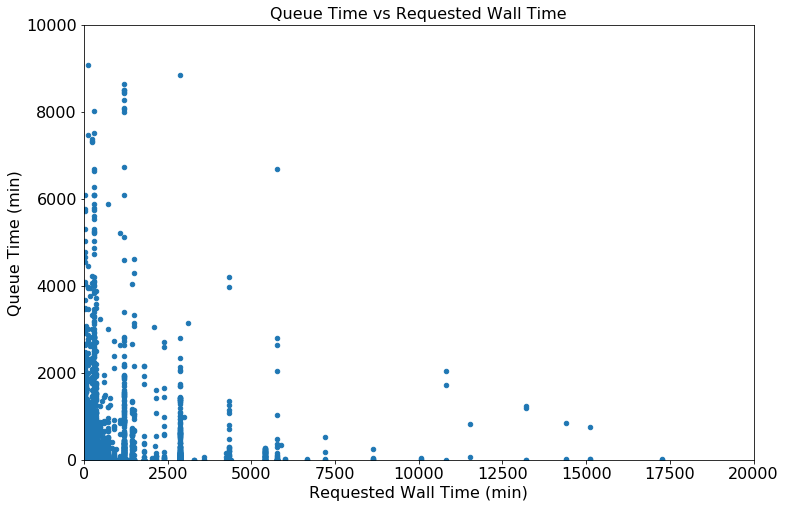

In [101]:
q1_df_rand.plot(kind='scatter', x='req_time', y='queue_time', xlim=(0,20000), ylim=(0,10000), fontsize = 16)
plt.title('Queue Time vs Requested Wall Time', fontsize = 16)
plt.xlabel('Requested Wall Time (min)', fontsize = 16)
plt.ylabel('Queue Time (min)', fontsize = 16)

Text(0,0.5,'Queue Time (min)')

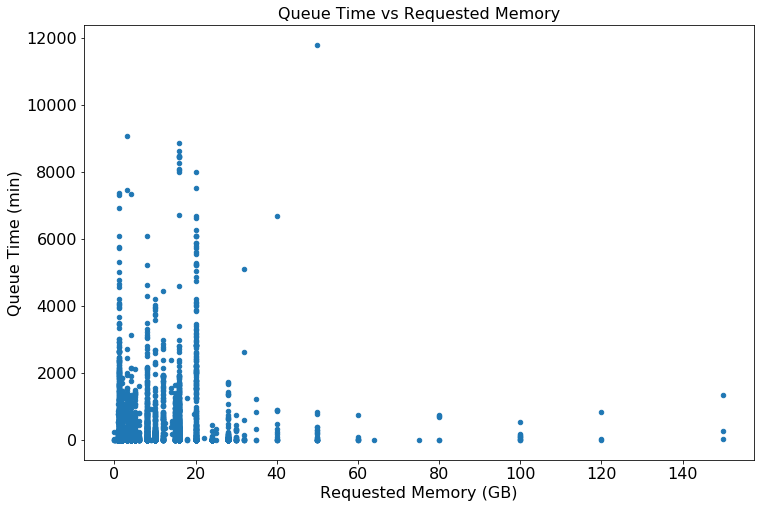

In [100]:
q1_df_rand.plot(kind='scatter', x='mem_int', y='queue_time', fontsize = 16)
plt.title('Queue Time vs Requested Memory', fontsize = 16)
plt.xlabel('Requested Memory (GB)', fontsize = 16)
plt.ylabel('Queue Time (min)', fontsize = 16)

# There doesn't appear to be much correlation between the variables

# Maybe a slight negative correlation between Queue Time and Max Wall Time

## Let's look at the distribution of Requested Wall Times

Text(0.5,0,'Requested Time (min)')

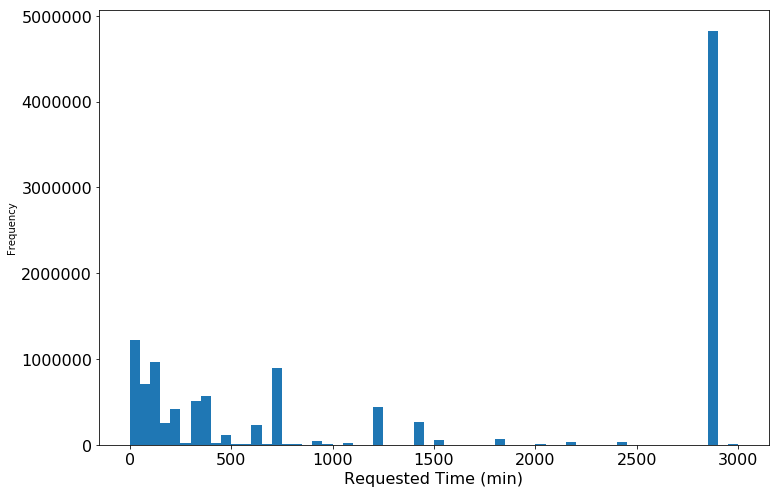

In [102]:
q1_df['req_time'].plot(kind='hist', bins = 60, range = (0,3000), fontsize = 16)
plt.xlabel('Requested Time (min)', fontsize = 16)

## Now a distribution of Requested Memory

Text(0.5,0,'Requested Memory (GB)')

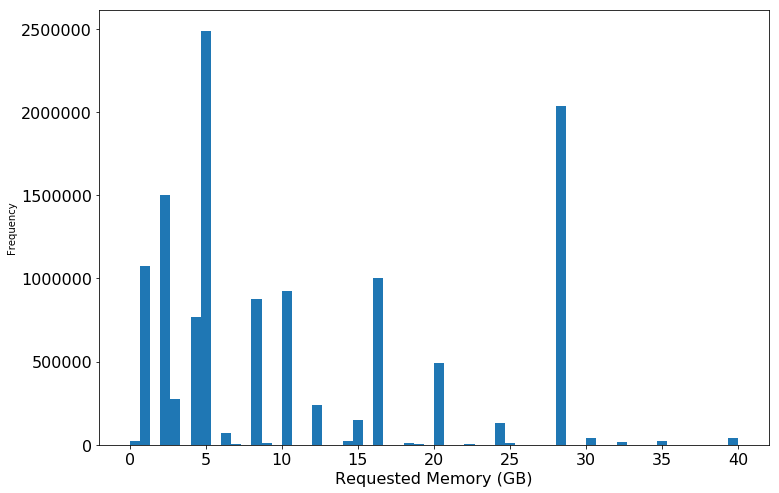

In [103]:
q1_df['mem_int'].plot(kind='hist', bins = 60, range = (0,40), fontsize = 16)
plt.xlabel('Requested Memory (GB)', fontsize = 16)

## Looking at Node and Core requests

Text(0.5,1,'Amount of People Who Request Per Node or Core')

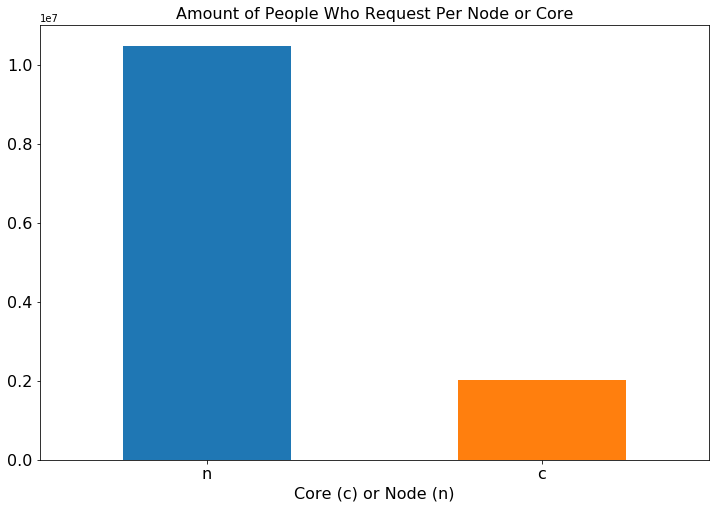

In [104]:
q1_df['core_node'].value_counts().plot(kind='bar', rot=0, fontsize = 16)
plt.xlabel('Core (c) or Node (n)', fontsize = 16)
plt.title('Amount of People Who Request Per Node or Core', fontsize = 16)

In [29]:
q1_df_core = q1_df[q1_df['core_node'] == 'c']
q1_df_node = q1_df[q1_df['core_node'] == 'n']
print('The number of users who request per core is ' + str(len(q1_df_core)))
print('The number of users who request per node is ' + str(len(q1_df_node)))

The number of users who request per core is 2012344
The number of users who request per node is 10487045


In [30]:
q1_med = q1_df_rand.groupby('core_node').median()
q1_med = q1_med.reset_index()
print(q1_med.head(30))

  core_node  queue_time  req_time  mem_int
0         c   17.425000     720.0      2.0
1         n   59.866667    2880.0      8.0


## Looking at the number who specify per core or per node for the random sample

In [31]:
q1_df_core_rand = q1_df_rand[q1_df_rand['core_node'] == 'c']
q1_df_node_rand = q1_df_rand[q1_df_rand['core_node'] == 'n']
print('The number of users who request per core is ' + str(len(q1_df_core_rand)))
print('The number of users who request per node is ' + str(len(q1_df_node_rand)))

The number of users who request per core is 802
The number of users who request per node is 4198


## Let's break the data down to a smaller subset

## We'll first look at those who request less than 5 GB

## Let's look at a scatter plot for people who request less than 5 GB 

Text(0,0.5,'Queue Time (min)')

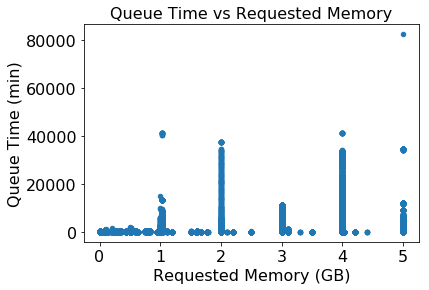

In [32]:
# Subsetting by mem_int less than or equal to 5
q1_df_less_5 = q1_df[q1_df['mem_int'] <= 5]
q1_df_less_5.plot(kind='scatter', x='mem_int', y='queue_time', fontsize = 16)
plt.title('Queue Time vs Requested Memory', fontsize = 16)
plt.xlabel('Requested Memory (GB)', fontsize = 16)
plt.ylabel('Queue Time (min)', fontsize = 16)

## We can see the columns at 1,2,3,4,5 but the other memory requests all have lower queue times

# Let's visualize with the less common requests in a different color

Text(0,0.5,'Queue Time (min)')

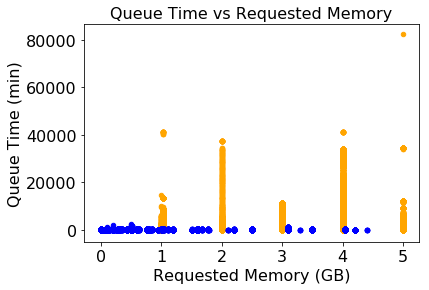

In [33]:
q1_df_less_5_common = q1_df_less_5.loc[q1_df_less_5['mem_int'].isin([1,1.024, 2,3,4,5])]
ax = q1_df_less_5_common.plot(kind='scatter', x='mem_int', y='queue_time', color='orange', fontsize = 16)

q1_df_less_5_rare = q1_df_less_5.loc[~q1_df_less_5['mem_int'].isin([1,1.024, 2,3,4,5])]
q1_df_less_5_rare.plot(kind='scatter', x='mem_int', y='queue_time', color='blue', ax=ax, fontsize = 16)

plt.title('Queue Time vs Requested Memory', fontsize = 16)
plt.xlabel('Requested Memory (GB)', fontsize = 16)
plt.ylabel('Queue Time (min)', fontsize = 16)

## All of the blue dots appear to have lower queue times than the orange, indicating that the less common requests have a shorter queue time

## Let's investigate further

In [34]:
med_q1_df_less_5_common = q1_df_less_5_common.groupby('mem_int').median()
med_q1_df_less_5_common = med_q1_df_less_5_common.reset_index()

med_q1_df_less_5_rare = q1_df_less_5_rare.groupby('mem_int').median().sort_values(by='mem_int', ascending = False)
med_q1_df_less_5_rare = med_q1_df_less_5_rare.reset_index()

print('The number of users submitting 1, 1.024, 2, 3, 4, or 5 is ' + str(len(q1_df_less_5_common.index)))
print('The number of users submitting anything else is ' + str(len(q1_df_less_5_rare.index)))

print('The median queue time for the most common requested memory is ' + str(round(q1_df_less_5_common['queue_time'].median(), 2)) + ' minutes'
     + ' vs. a median queue time of ' + str(round(q1_df_less_5_rare['queue_time'].median(), 2)) + ' minutes for rare submissions')

# print('The mean queue time for the most common requested memory is ' + str(round(q1_df_less_5_common['queue_time'].mean(), 2)) + ' minutes'
     #+ ' vs. a mean queue time of ' + str(round(q1_df_less_5_rare['queue_time'].mean(), 2)) + ' minutes for rare submissions')


The number of users submitting 1, 1.024, 2, 3, 4, or 5 is 6107247
The number of users submitting anything else is 28130
The median queue time for the most common requested memory is 59.03 minutes vs. a median queue time of 7.39 minutes for rare submissions


# We can see that the median queue times is significantly lower for the rare submissions than the common submissions

In [35]:
time_pct_group = q1_df_less_5[['req_time', 'core_node']].groupby('req_time').agg('count').sort_values(by ='core_node', ascending = False).head(30)
time_pct_group = time_pct_group.reset_index()
time_pct_group.columns = [['req_time','Count']]
time_pct_group['JobPct'] = time_pct_group['Count'] / len(q1_df_less_5.index) * 100
print(time_pct_group.head(15))

   req_time    Count     JobPct
0    2880.0  2677760  43.644588
1     720.0   787105  12.828959
2      30.0   346400   5.645945
3     240.0   232489   3.789319
4      60.0   204725   3.336796
5      15.0   164532   2.681693
6    1440.0   157529   2.567552
7   20160.0   149029   2.429011
8     120.0   136170   2.219424
9     300.0   122843   2.002208
10   5400.0   119139   1.941837
11      2.0   107457   1.751433
12    600.0    78199   1.274559
13    180.0    61987   1.010321
14      1.0    61720   1.005969


## Does this hold up for requests above 5 GB?

Text(0,0.5,'Queue Time (min)')

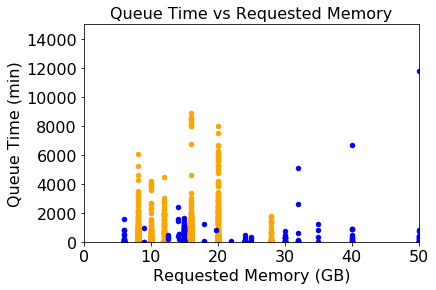

In [36]:
# Using the random subset for this one to make the plots cleaner
q1_df_greater_5 = q1_df_rand[q1_df_rand['mem_int'] > 5]
#q1_df_greater_5 = q1_df[q1_df['mem_int'] > 5]

q1_df_greater_5_common = q1_df_greater_5.loc[q1_df_greater_5['mem_int'].isin([28,10, 8,16,20, 12])]
ax = q1_df_greater_5_common.plot(kind='scatter', x='mem_int', y='queue_time', color='orange', fontsize = 16)

q1_df_greater_5_rare = q1_df_greater_5.loc[~q1_df_greater_5['mem_int'].isin([28,10, 8,16,20, 12])]
q1_df_greater_5_rare.plot(kind='scatter', x='mem_int', y='queue_time', color='blue', ax=ax, fontsize = 16)

plt.axis([0,50,0,15000])
plt.title('Queue Time vs Requested Memory', fontsize = 16)
plt.xlabel('Requested Memory (GB)', fontsize = 16)
plt.ylabel('Queue Time (min)', fontsize = 16)


## The blue dots once again appear to be lower than the orange ones

## Let's look at the medians and means again

In [37]:
med_q1_df_greater_5_common = q1_df_greater_5_common.groupby('mem_int').median()
med_q1_df_greater_5_common = med_q1_df_greater_5_common.reset_index()

med_q1_df_greater_5_rare = q1_df_greater_5_rare.groupby('mem_int').median().sort_values(by='mem_int', ascending = False)
med_q1_df_greater_5_rare = med_q1_df_greater_5_rare.reset_index()

print('The number of users submitting 1, 1.024, 2, 3, 4, or 5 is ' + str(len(q1_df_greater_5_common.index)))
print('The number of users submitting anything else is ' + str(len(q1_df_greater_5_rare.index)))

print('The median queue time for the most common requested memory is ' + str(round(q1_df_greater_5_common['queue_time'].median(), 2)) + ' minutes'
     + ' vs. a median queue time of ' + str(round(q1_df_greater_5_rare['queue_time'].median(), 2)) + ' minutes for rare submissions')

#print('The mean queue time for the most common requested memory is ' + str(round(q1_df_less_5_common['queue_time'].mean(), 2)) + ' minutes'
 #    + ' vs. a mean queue time of ' + str(round(q1_df_greater_5_rare['queue_time'].mean(), 2)) + ' minutes for rare submissions')


The number of users submitting 1, 1.024, 2, 3, 4, or 5 is 2212
The number of users submitting anything else is 269
The median queue time for the most common requested memory is 60.43 minutes vs. a median queue time of 45.72 minutes for rare submissions


## The median queue time is still significantly lower for rare submissions

## This leads us to conclude that there is a correlation between how common the requested memory is and the resulting queue time

## Shorter queue times can be achieved by submitting uncommon memory requests

## This relationship could result from the remaining memory after somebody requests a fractional amount. For example, if a 0.5 GB request gets filled a spot that has total GB available, then a 4.3 GB submission could fit in the slot while a 5 GB submission could not.

## This could also be impacted by the 1024 MB submissions if they are processed as 1.024 GB rather than 1 GB because that is a common requested memory submission.

## Let's standardize so that we look at the graphs for people who request the same amount of time. Those who request the same amount of time plotted on a line

# Time to look more into how requested wall time impacts queue time

In [270]:
#q1_df_node_720 = q1_df_node[q1_df_node['req_time'] == 720]
#q1_df_node_720['mem_int'].plot(kind='hist', bins = 200, xlim=(0,20), fontsize = 16)
#plt.xlabel('Requested Memory (GB)', fontsize = 16)

In [269]:
#q1_df_node_2880 = q1_df_node_rand[q1_df_node_rand['req_time'] == 2880]
#q1_df_node_2880['mem_int'].plot(kind='hist', bins = 30, range=(0,30), fontsize = 16)
#plt.xlabel('Requested Memory (GB)', fontsize = 16)

Text(0.5,0,'Queue Time (min)')

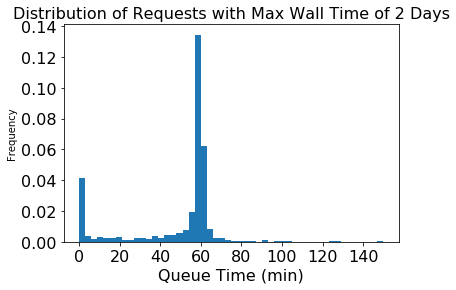

In [40]:
q1_df_node_2880['queue_time'].plot(kind='hist', bins = 50, range=(0,150), density=True, fontsize = 16)
plt.title('Distribution of Requests with Max Wall Time of 2 Days', fontsize = 16)
plt.xlabel('Queue Time (min)', fontsize = 16)

## This shows that for jobs that request 2 days (~39% of jobs) they either start right away or wait for about an hour

Text(0.5,0,'Queue Time (min)')

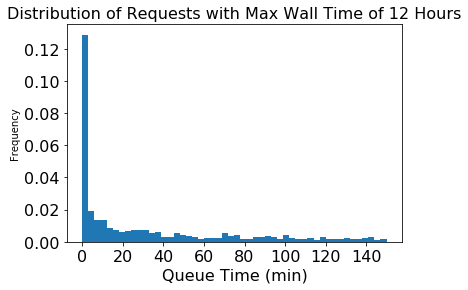

In [41]:
q1_df_node_720 = q1_df_node[q1_df_node['req_time'] == 720]
q1_df_node_720['queue_time'].plot(kind='hist', bins = 50, range=(0,150), density=True, fontsize = 16)
plt.title('Distribution of Requests with Max Wall Time of 12 Hours', fontsize = 16)
plt.xlabel('Queue Time (min)', fontsize = 16)

Text(0.5,0,'Queue Time (min)')

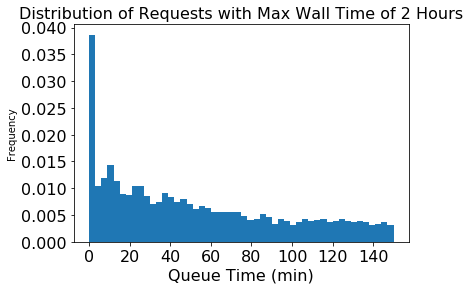

In [42]:
q1_df_node_120 = q1_df_node[q1_df_node['req_time'] == 120]
q1_df_node_120['queue_time'].plot(kind='hist', bins = 50, cumulative=False, density = True, range=(0,150), fontsize = 16)
plt.title('Distribution of Requests with Max Wall Time of 2 Hours', fontsize = 16)
plt.xlabel('Queue Time (min)', fontsize = 16)

Text(0.5,0,'Queue Time (min)')

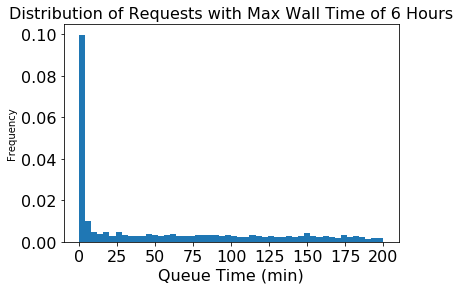

In [43]:
q1_df_node_360 = q1_df_node[q1_df_node['req_time'] == 360]
q1_df_node_360['queue_time'].plot(kind='hist', bins = 50, range=(0,200), density=True, fontsize = 16)
plt.title('Distribution of Requests with Max Wall Time of 6 Hours', fontsize = 16)
plt.xlabel('Queue Time (min)', fontsize = 16)

Text(0.5,0,'Queue Time (min)')

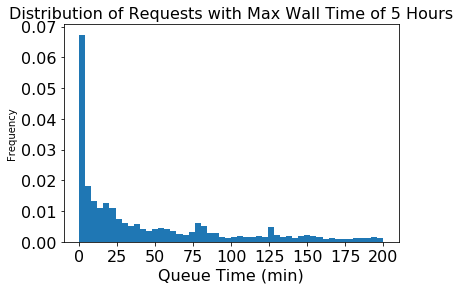

In [44]:
q1_df_node_300 = q1_df_node[q1_df_node['req_time'] == 300]
q1_df_node_300['queue_time'].plot(kind='hist', bins = 50, range=(0,200), density=True, fontsize = 16)
plt.title('Distribution of Requests with Max Wall Time of 5 Hours', fontsize = 16)
plt.xlabel('Queue Time (min)', fontsize = 16)

## The smaller requested times have a larger proportion that start quickly

## Let's look at median requested time for the top 100 requested times in terms of number of submisions

In [271]:
# Finding the top 100 requested times
time_100 = req_time_group.iloc[:100]
print(time_100.tail())

# List of the values to use for filtering later
time_list = time_100['req_time'].values


   req_time JobCount    JobPct
95    157.0     1860  0.014881
96    330.0     1772  0.014177
97   1830.0     1667  0.013337
98   3300.0     1605  0.012841
99    144.0     1599  0.012793


In [244]:
# Finding the job submissions that request a time in the top 100
top_100_sub = q1_df_node.loc[q1_df_node.req_time.isin(time_list)]

top_100_sub.tail()

,queue_time,req_time,mem_int,core_node,State,Account
12499303,0.183333,2880.0,4.0,n,COMPLETED,cms_samtest
12499345,0.000000,2880.0,4.0,n,COMPLETED,cms_samtest
12499349,0.150000,2880.0,4.0,n,COMPLETED,cms_samtest
12499355,0.133333,2880.0,4.0,n,COMPLETED,cms_samtest
12499388,0.000000,2880.0,4.0,n,COMPLETED,cms_samtest


In [268]:
# top_100_mem_5 = top_100_sub[top_100_sub['mem_int'] == 12]
# top_100_mem_5.info()

In [262]:
q1_median_group = top_100_sub.groupby('req_time').median().sort_values(by = 'queue_time', ascending = False)
q1_median_group = q1_median_group.reset_index()
print(q1_median_group.head(15))

    req_time   queue_time  mem_int
0     3120.0  2516.016667    4.000
1        1.0  1290.866667    2.000
2        2.0  1282.750000    2.000
3      780.0   902.300000   16.000
4     1500.0   861.983333   16.000
5      782.0   848.700000   20.000
6      300.0   789.333333   20.000
7     2100.0   714.566667    8.000
8    20160.0   670.800000    1.024
9    10800.0   553.866667    1.024
10     480.0   544.850000    8.000
11     900.0   537.000000   10.000
12     240.0   458.350000    1.024
13     570.0   454.300000   16.000
14     160.0   450.383333    4.000


## 3120 minutes is 52 hours, leading the pack in median queue time at 2516 minutes (~42 hours)

In [263]:
q1_median_x_fit = q1_median_group['req_time'].values
q1_median_y_fit = q1_median_group['queue_time'].values

In [264]:
z = np.polyfit(q1_median_x_fit, q1_median_y_fit, 1)

In [265]:
p = np.poly1d(z)

In [266]:
xp = np.linspace(0, 20000, 50000)

Text(0,0.5,'Queue Time (min)')

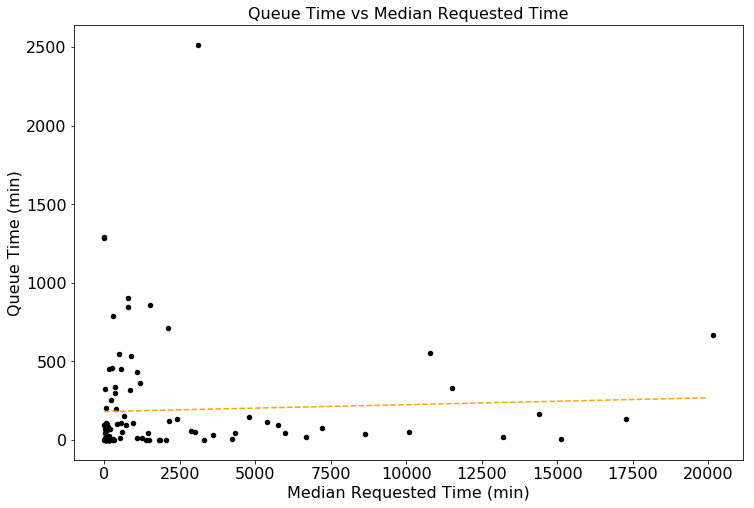

In [267]:
q1_median_group.plot(kind='scatter', x='req_time', y='queue_time', fontsize = 16, color='k')
plt.plot(xp, p(xp), '--', color='orange')
plt.title('Queue Time vs Median Requested Time', fontsize = 16)
plt.xlabel('Median Requested Time (min)', fontsize = 16)
plt.ylabel('Queue Time (min)', fontsize = 16)

## The trendline increases as requested time increases, indicating that more time requested results in a longer queue time

## However, it appears as if the higher requested times result in more consistent shorter queue times. This could be a result of higher priority being placed on jobs with higher maximum wall time

## Accounts have tendencies with what times they request.
## This could lead to outliers based on fairshare if the high median queue times are associated with a single account
## In the future would need to isolate accounts or incorporate fairshare in some way

# Question 2. Are there any nodes that fail more than the others

In [63]:
# Unique values to find the state to look at
accre_df.State.unique()


array(['COMPLETED', 'TIMEOUT', 'CANCELLED by 29607', 'FAILED',
       'CANCELLED by 454080', 'CANCELLED by 100684',
       'CANCELLED by 667840', 'CANCELLED by 660360',
       'CANCELLED by 481000', 'CANCELLED by 0', 'CANCELLED by 229215',
       'CANCELLED by 633620', 'CANCELLED by 207302',
       'CANCELLED by 124006', 'CANCELLED by 112602',
       'CANCELLED by 172079', 'CANCELLED by 199052',
       'CANCELLED by 156369', 'CANCELLED by 389801', 'NODE_FAIL',
       'CANCELLED by 123148', 'CANCELLED by 501421',
       'CANCELLED by 525961', 'CANCELLED by 352698',
       'CANCELLED by 169859', 'CANCELLED by 144605', 'CANCELLED by 85636',
       'CANCELLED by 240352', 'CANCELLED by 195638',
       'CANCELLED by 534784', 'CANCELLED by 379605',
       'CANCELLED by 308082', 'CANCELLED by 28075', 'CANCELLED by 337100',
       'CANCELLED by 497968', 'CANCELLED by 485800',
       'CANCELLED by 237813', 'CANCELLED by 504485',
       'CANCELLED by 174942', 'CANCELLED by 171742',
       'CANCEL

In [64]:
# Filtering out the jobs that run on multiple nodes
Jobs_df=accre_df.loc[accre_df['NodeList'].str[3]!='[', :]


## We're looking for the nodes that have a state of NODE_FAIL

In [65]:
#Slice the dataframe to show all failed jobs
jobs_failure = Jobs_df[(Jobs_df.State=="NODE_FAIL")]
jobs_failure.head()

,JobID,JobIDRaw,Cluster,Partition,Account,Group,GID,User,UID,Submit,...,ReqGRES,ReqTRES,Timelimit,NodeList,JobName,queue_time,req_time,mem_cat,mem_int,core_node
22163,15839577_49,15839577,accre,production,capra_lab_csb,capra_lab,20429,sivleyrm,156369.0,2017-07-03 16:33:30,...,NaN,"cpu=1,mem=10G,node=1",5-00:00:00,vmp1342,rsa_K,0.016667,7200.0,Gn,10.0,n
22166,15839577_2,15839580,accre,production,capra_lab_csb,capra_lab,20429,sivleyrm,156369.0,2017-07-03 16:33:30,...,NaN,"cpu=1,mem=10G,node=1",5-00:00:00,vmp1055,rsa_K,0.000000,7200.0,Gn,10.0,n
22167,15839577_3,15839581,accre,production,capra_lab_csb,capra_lab,20429,sivleyrm,156369.0,2017-07-03 16:33:30,...,NaN,"cpu=1,mem=10G,node=1",5-00:00:00,vmp1043,rsa_K,0.000000,7200.0,Gn,10.0,n
22204,15839577_40,15839618,accre,production,capra_lab_csb,capra_lab,20429,sivleyrm,156369.0,2017-07-03 16:33:30,...,NaN,"cpu=1,mem=10G,node=1",5-00:00:00,vmp1342,rsa_K,0.016667,7200.0,Gn,10.0,n
22205,15839577_41,15839619,accre,production,capra_lab_csb,capra_lab,20429,sivleyrm,156369.0,2017-07-03 16:33:30,...,NaN,"cpu=1,mem=10G,node=1",5-00:00:00,vmp1342,rsa_K,0.016667,7200.0,Gn,10.0,n


In [66]:
#Drop unused columns
jobs_failed=jobs_failure[['JobID', 'ExitCode', 'State', 'NodeList']]
jobs_failed.head()

,JobID,ExitCode,State,NodeList
22163,15839577_49,0:0,NODE_FAIL,vmp1342
22166,15839577_2,0:0,NODE_FAIL,vmp1055
22167,15839577_3,0:0,NODE_FAIL,vmp1043
22204,15839577_40,0:0,NODE_FAIL,vmp1342
22205,15839577_41,0:0,NODE_FAIL,vmp1342


In [67]:
#Count how many times each node has failed
pd.DataFrame(jobs_failed.NodeList.value_counts());

In [68]:
#Count how many times every node has been used overall
pd.DataFrame(Jobs_df.NodeList.value_counts());

In [69]:
failed = {}
for key, value in jobs_failed[jobs_failed.State.isin(['NODE_FAIL'])].groupby('NodeList').size().iteritems():
    failed.update({key: value})

In [70]:
failed_df = pd.DataFrame.from_dict(failed, orient='index', columns=["failures"])
failed_df.reset_index(level=0, inplace=True)
failed_df.head()

,index,failures
0,gpu0001,2
1,gpu0002,1
2,gpu0003,1
3,gpu0004,2
4,gpu0005,2


In [71]:
total = {}
for key, value in Jobs_df.groupby('NodeList').size().iteritems():
    total.update({key: value})

In [72]:
# Create df with total uses to find percentage
total_df = pd.DataFrame.from_dict(total, orient='index', columns=["uses"])
total_df.reset_index(level=0, inplace=True)
total_df.head()

,index,uses
0,None assigned,3470227
1,amn0008,130
2,amn0009,109
3,gpu0001,5891
4,gpu0002,4072


In [73]:
# Combining to have the failures and uses in one df
overall_df = pd.merge(total_df, failed_df, how='outer')
overall_df.head()

,index,uses,failures
0,None assigned,3470227,NaN
1,amn0008,130,NaN
2,amn0009,109,NaN
3,gpu0001,5891,2.0
4,gpu0002,4072,1.0


In [74]:
# Initializing a percent fail column
overall_df['Pct_Fail'] = ""
overall_df.head()

,index,uses,failures,Pct_Fail
0,None assigned,3470227,NaN,
1,amn0008,130,NaN,
2,amn0009,109,NaN,
3,gpu0001,5891,2.0,
4,gpu0002,4072,1.0,


In [75]:
# Filling NaN with 0 because the NaN indicates there were no failures
overall_df['failures'].fillna(0, inplace=True)


In [76]:
# Finding percentage to compare by failure rate
overall_df['Pct_Fail']=overall_df.failures/overall_df.uses*100
overall_df.head()

,index,uses,failures,Pct_Fail
0,None assigned,3470227,0.0,0.000000
1,amn0008,130,0.0,0.000000
2,amn0009,109,0.0,0.000000
3,gpu0001,5891,2.0,0.033950
4,gpu0002,4072,1.0,0.024558


In [77]:
# Sorting by failure rate to find those that fail the most
overall_df.sort_values("Pct_Fail", ascending = False, inplace = True)
overall_df.head()

,index,uses,failures,Pct_Fail
42,vm-qa-node004,6,1.0,16.666667
629,vmp595,1018,8.0,0.785855
632,vmp598,1042,7.0,0.671785
626,vmp592,1084,7.0,0.645756
647,vmp692,1117,7.0,0.626679


## vm-qa-node004 has the highest failure rate, but it was only used 6 times

In [78]:
# Filter out the 0s and the one outlier
overall_full_subset = overall_df[overall_df['Pct_Fail']>0]
overall_full_subset = overall_full_subset[overall_full_subset['Pct_Fail']<1]
overall_full_subset.head()

,index,uses,failures,Pct_Fail
629,vmp595,1018,8.0,0.785855
632,vmp598,1042,7.0,0.671785
626,vmp592,1084,7.0,0.645756
647,vmp692,1117,7.0,0.626679
649,vmp696,1118,7.0,0.626118


In [79]:
#Finding the top 25 failure rate
overall_final = overall_full_subset.head(25)
overall_final.columns = ['Node', 'uses', 'failures', 'Pct_Fail']
overall_final

,Node,uses,failures,Pct_Fail
629,vmp595,1018,8.0,0.785855
632,vmp598,1042,7.0,0.671785
626,vmp592,1084,7.0,0.645756
647,vmp692,1117,7.0,0.626679
649,vmp696,1118,7.0,0.626118
24,gpu0022,505,3.0,0.594059
648,vmp695,1097,5.0,0.455789
12,gpu0010,1097,5.0,0.455789
631,vmp597,1099,5.0,0.454959
651,vmp698,1147,5.0,0.435920


## The highest failure rate was only 0.79%, indicating that the nodes are pretty reliable

In [80]:
overall_full_subset.tail()

,index,uses,failures,Pct_Fail
50,vmp1010,36912,1.0,0.002709
46,vmp1003,38681,1.0,0.002585
257,vmp1298,47568,1.0,0.002102
44,vmp1001,66221,1.0,0.001510
368,vmp1409,92419,1.0,0.001082


In [81]:
# Look at teh metrics of the dataframe
overall_full_subset.Pct_Fail.describe()


count    592.000000
mean       0.044829
std        0.082634
min        0.001082
25%        0.010810
50%        0.026098
75%        0.049695
max        0.785855
Name: Pct_Fail, dtype: float64

# Visualize the failure rate and number of uses

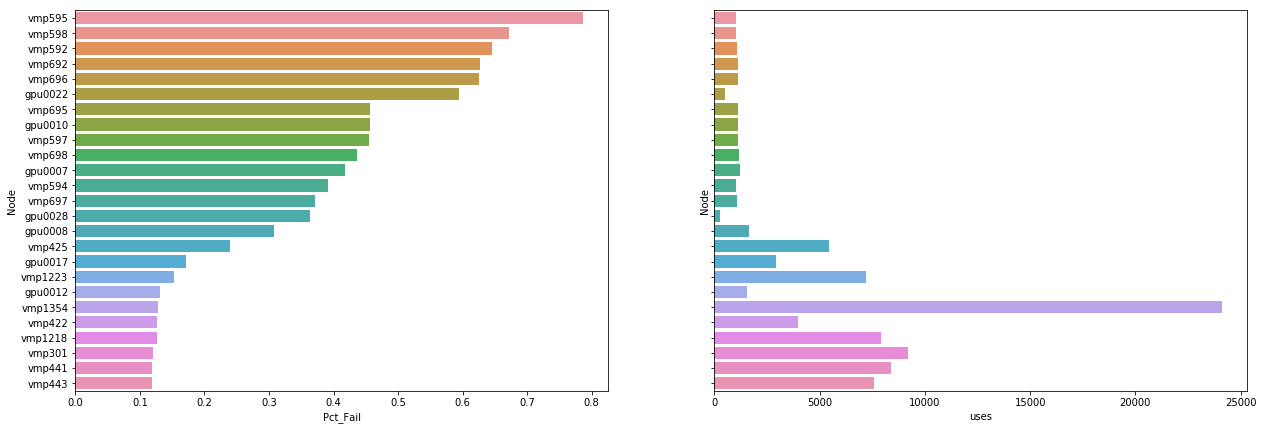

In [82]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize = (21,7), sharey=True)
sns.barplot(overall_final.Pct_Fail, overall_final.Node, orient='h', ax=ax1);

sns.barplot(overall_final.uses, overall_final.Node, orient='h', ax=ax2);
plt.show()


# We can see that vmp595 has the highest failure rate at 0.7896%. The highest number of failures is vmp1354, but it is used far more often

# Question 3. Are there problematic users? 

Thos who submit at least 500 jobs within a 4 hour window that run for 5 minutes or less

In [83]:
# keep only sumbit, user, jobidraw and elapsed time column for analysis
accre_select_df=accre_df.loc[:,['Submit','User','JobIDRaw','Elapsed','State']]
accre_select_df.head()

,Submit,User,JobIDRaw,Elapsed,State
0,2017-07-02 00:40:58,masispider,15806649,1 days 01:05:21,COMPLETED
1,2017-07-02 00:40:58,masispider,15806664,0 days 23:51:47,COMPLETED
2,2017-07-02 00:40:58,masispider,15806670,1 days 01:59:51,COMPLETED
3,2017-07-02 00:40:58,masispider,15806671,1 days 08:02:20,COMPLETED
4,2017-07-01 05:00:00,uscms010,15811617,0 days 00:00:10,COMPLETED


## Select jobs with elapsed time of less than 5 minutes

In [84]:
accre_5_minutes_df= accre_select_df[accre_select_df.Elapsed<'0 days 00:05:00']

## Now that we just have the jobs less than 5 minutes, we only need submit, user and JobIDRaw columns to use below

In [85]:
accre_5_minutes=accre_5_minutes_df.loc[:,['Submit','User','JobIDRaw']]
accre_5_minutes.head(10)

,Submit,User,JobIDRaw
4,2017-07-01 05:00:00,uscms010,15811617
5,2017-07-01 05:00:01,autocms,15811618
6,2017-07-01 05:00:02,tuos,15811619
7,2017-07-01 05:00:22,uscms010,15811621
8,2017-07-01 05:01:01,autocms,15811624
9,2017-07-01 05:01:02,tuos,15811625
31,2017-07-01 05:01:26,vuiiscci,15811649
33,2017-07-01 05:01:26,vuiiscci,15811651
34,2017-07-01 05:01:56,uscms010,15811654
35,2017-07-01 05:02:02,autocms,15811655


## Group and count the short jobs in a 4 hours range

In [86]:
# Rolling window and count jobs within the 4 hour window
grouped_by_4h = accre_5_minutes.groupby('User').rolling('4h', on='Submit').JobIDRaw.count()
grouped_by_4h.head()

User     Submit             
abraha1  2017-10-07 18:58:44    1.0
         2017-10-07 19:06:01    2.0
         2017-10-07 19:12:39    3.0
         2017-10-07 19:21:18    4.0
         2017-10-07 19:29:20    5.0
Name: JobIDRaw, dtype: float64

In [87]:
rolling_df = pd.DataFrame(grouped_by_4h)
rolling_df = rolling_df.reset_index()
rolling_df.columns = ['User', 'Submit', 'ShortJobCount']
rolling_df.head()

,User,Submit,ShortJobCount
0,abraha1,2017-10-07 18:58:44,1.0
1,abraha1,2017-10-07 19:06:01,2.0
2,abraha1,2017-10-07 19:12:39,3.0
3,abraha1,2017-10-07 19:21:18,4.0
4,abraha1,2017-10-07 19:29:20,5.0


In [88]:
rolling_max= rolling_df[['User', 'ShortJobCount']].groupby('User').max()
rolling_max.head(10)

,ShortJobCount
User,
abraha1,17948.0
actkink,13.0
ahmedi,21.0
aimantj,198.0
ainoosj,4.0
albertme,25.0
anandip,6.0
andera,2.0
anderdm1,7.0


In [89]:
# The most jobs that a user submitted within a 4 hour window
grouped_by_4h_500=rolling_max[rolling_max['ShortJobCount']>=500].sort_values(by = 'ShortJobCount', ascending=False)
#grouped_by_4h_500 = grouped_by_4h_500.reset_index()
grouped_by_4h_500.head(10)

,ShortJobCount
User,
sotocs,242719.0
wangj36,75906.0
jacklisr,69808.0
zhangdk,63331.0
cmsglidein,49154.0
janjamrk,41174.0
deik,31723.0
schlunsg,27574.0
jiany17,20724.0


# bar plot of top 30 users running more than 500 short jobs within 4 hours


Text(0.5,0,'User')

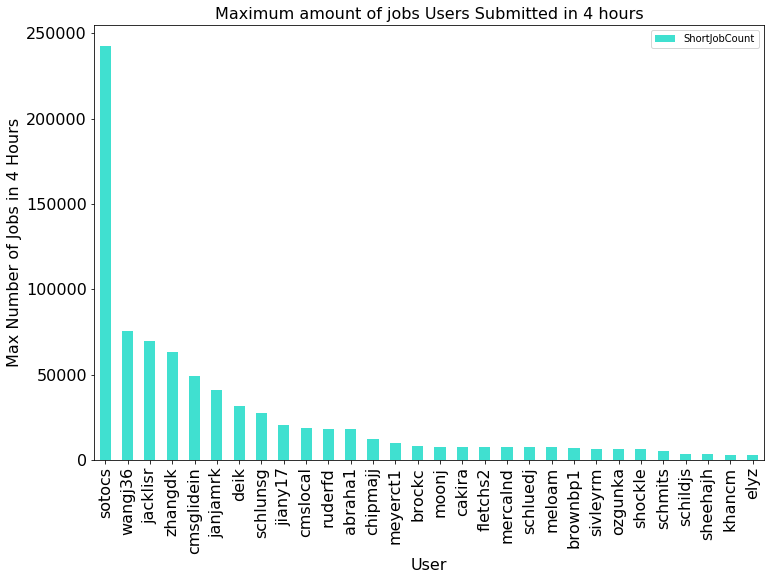

In [90]:
grouped_by_4h_500.iloc[:30].plot(kind = 'bar', legend=True,fontsize=16, figsize=(12,8), color='turquoise')

plt.title('Maximum amount of jobs Users Submitted in 4 hours', fontsize = 16)
plt.ylabel('Max Number of Jobs in 4 Hours', fontsize = 16)
plt.xlabel('User', fontsize=16)

## Now we know who submitted the most jobs in a 4 hour window, but how many instances were there of users submitting at least 500 jobs

In [91]:
# Checking to see when 500 is reached
# This will be used to count how many times a user submitted 500 jobs in a 4 hour window
accre_500_occurence = rolling_df[rolling_df['ShortJobCount']==500]
accre_500_occurence.head(10)

,User,Submit,ShortJobCount
1212,abraha1,2018-01-27 23:34:02,500.0
3506,abraha1,2018-03-25 15:06:33,500.0
6222,abraha1,2018-03-26 20:29:33,500.0
7103,abraha1,2018-06-22 05:59:41,500.0
9918,abraha1,2018-06-22 20:20:02,500.0
10751,abraha1,2018-06-23 23:41:33,500.0
16922,abraha1,2018-06-27 15:34:10,500.0
203051,autocms,2017-11-16 08:12:02,500.0
463065,badamifs,2017-08-09 19:57:30,500.0
465038,badamifs,2017-08-11 14:46:20,500.0


## So who are the people who offended the most

In [92]:
repeat_offender_count=accre_500_occurence[['User', 'ShortJobCount']].groupby('User').agg('count').sort_values(by ='ShortJobCount', ascending = False)
repeat_offender_count.columns = ['Instances']
repeat_offender_count.head(10)

,Instances
User,
cmsglidein,356
brockc,118
cmslocal,113
msrc,82
moonj,56
ozgunka,56
schluedj,41
deik,40
jiany17,29


## Bar plot of the Top 30 repeat offenders 

Text(0.5,0,'User')

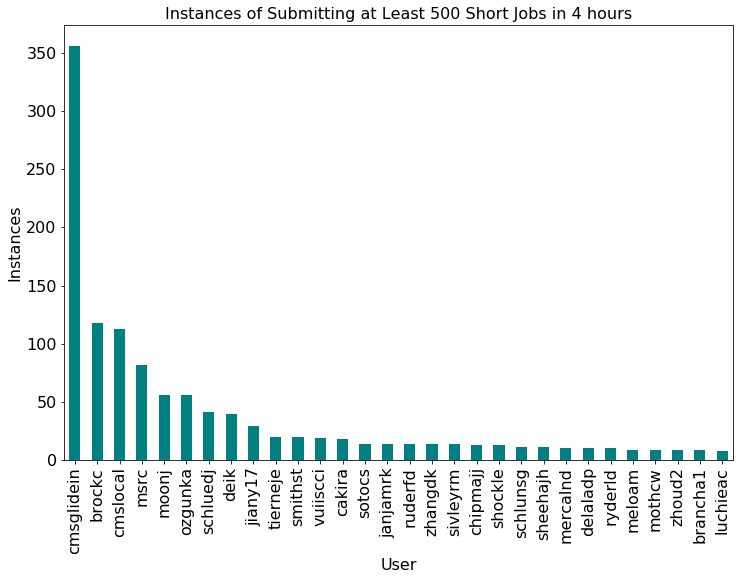

In [93]:
repeat_offender_count.iloc[:30].plot(kind = 'bar', legend=False,fontsize=16, figsize=(12,8), color='teal')

plt.title('Instances of Submitting at Least 500 Short Jobs in 4 hours', fontsize = 16)
plt.ylabel('Instances', fontsize = 16)
plt.xlabel('User', fontsize=16)

## We can see that cmsglidein is the most problematic user since there were over 350 4 hour windows with at least 500 short job submissions

# Additional Exploration

## Accounts that submit the most jobs

In [94]:
acct_pct_group=accre_df[['Account', 'JobIDRaw']].groupby('Account').agg('count').sort_values(by ='JobIDRaw', ascending = False).head(30)
acct_pct_group = acct_pct_group.reset_index()
acct_pct_group.columns = [['AccountName','Count']]
acct_pct_group['JobPct'] = acct_pct_group['Count'] / len(accre_df.index) * 100
print(acct_pct_group.head(15))

          AccountName    Count     JobPct
0                 cms  3539682  28.318840
1            beam_lab  1447136  11.577654
2         cms_lowprio   928918   7.431707
3        p_csb_meiler   762188   6.097802
4          cms_stage2   663017   5.304395
5            mip_eecs   575854   4.607057
6   h_biostat_student   446568   3.572719
7                lola   442628   3.541197
8            p_meiler   427429   3.419599
9                math   371118   2.969089
10         cms_stage3   302112   2.417014
11           rokaslab   295962   2.367812
12        cms_samtest   271589   2.172818
13                cgg   226560   1.812569
14            stassun   180297   1.442447


## The most common state for the jobs run

In [95]:
state_pct_group=accre_df[['State', 'JobIDRaw']].groupby('State').agg('count').sort_values(by ='JobIDRaw', ascending = False).head(30)
state_pct_group = state_pct_group.reset_index()
state_pct_group.columns = [['State','Count']]
state_pct_group['JobPct'] = state_pct_group['Count'] / len(accre_df.index) * 100
print(state_pct_group.head(15))

                  State    Count     JobPct
0             COMPLETED  7150200  57.204396
1    CANCELLED by 29607  3354734  26.839184
2                FAILED   902907   7.223609
3    CANCELLED by 29605   355327   2.842755
4               TIMEOUT   160402   1.283279
5   CANCELLED by 112888   105801   0.846449
6   CANCELLED by 233674    66809   0.534498
7   CANCELLED by 207302    44886   0.359106
8        CANCELLED by 0    29569   0.236564
9   CANCELLED by 551122    24607   0.196866
10   CANCELLED by 53988    19998   0.159992
11  CANCELLED by 233240    17531   0.140255
12  CANCELLED by 237602    17013   0.136111
13  CANCELLED by 342713    16950   0.135607
14  CANCELLED by 501421    16363   0.130910


## Finding the jobs with state: 'Cancelled by 29607'

In [96]:
g29607 = accre_df.loc[accre_df['State'] == 'CANCELLED by 29607']
g29607.head(10)

,JobID,JobIDRaw,Cluster,Partition,Account,Group,GID,User,UID,Submit,...,ReqGRES,ReqTRES,Timelimit,NodeList,JobName,queue_time,req_time,mem_cat,mem_int,core_node
333,15811976,15811976,accre,production,cms_lowprio,cms,31000,cmsglidein,NaN,2017-07-01 05:08:13,...,NaN,"cpu=1,mem=5000M,node=1",2-00:00:00,vmp1084,bl_0a8dbb748125,0.216667,2880.0,Mn,5.0,n
345,15812001,15812001,accre,production,cms_lowprio,cms,31000,cmsglidein,NaN,2017-07-01 05:10:58,...,NaN,"cpu=1,mem=5000M,node=1",2-00:00:00,vmp1125,bl_ce6cb456d537,0.466667,2880.0,Mn,5.0,n
464,15812208,15812208,accre,production,cms_lowprio,cms,31000,cmsglidein,NaN,2017-07-01 05:50:00,...,NaN,"cpu=1,mem=5000M,node=1",2-00:00:00,vmp1061,bl_6912aec9c558,0.466667,2880.0,Mn,5.0,n
467,15812211,15812211,accre,production,cms_lowprio,cms,31000,cmsglidein,NaN,2017-07-01 05:50:05,...,NaN,"cpu=1,mem=5000M,node=1",2-00:00:00,vmp1064,bl_36a387505a7a,0.383333,2880.0,Mn,5.0,n
468,15812212,15812212,accre,production,cms_lowprio,cms,31000,cmsglidein,NaN,2017-07-01 05:50:05,...,NaN,"cpu=1,mem=5000M,node=1",2-00:00:00,vmp1010,bl_b2a66b1f253e,0.383333,2880.0,Mn,5.0,n
469,15812213,15812213,accre,production,cms_lowprio,cms,31000,cmsglidein,NaN,2017-07-01 05:50:05,...,NaN,"cpu=1,mem=5000M,node=1",2-00:00:00,vmp1073,bl_28b10eb384f1,0.383333,2880.0,Mn,5.0,n
470,15812214,15812214,accre,production,cms_lowprio,cms,31000,cmsglidein,NaN,2017-07-01 05:50:05,...,NaN,"cpu=1,mem=5000M,node=1",2-00:00:00,vmp1007,bl_1e0513c2f2c7,0.383333,2880.0,Mn,5.0,n
471,15812215,15812215,accre,production,cms_lowprio,cms,31000,cmsglidein,NaN,2017-07-01 05:50:21,...,NaN,"cpu=1,mem=5000M,node=1",2-00:00:00,vmp1052,bl_38f20779d123,0.116667,2880.0,Mn,5.0,n
472,15812216,15812216,accre,production,cms_lowprio,cms,31000,cmsglidein,NaN,2017-07-01 05:50:21,...,NaN,"cpu=1,mem=5000M,node=1",2-00:00:00,vmp204,bl_31d63b0fbd16,0.116667,2880.0,Mn,5.0,n
473,15812217,15812217,accre,production,cms_lowprio,cms,31000,cmsglidein,NaN,2017-07-01 05:50:21,...,NaN,"cpu=1,mem=5000M,node=1",2-00:00:00,vmp201,bl_4a4e62d19656,0.116667,2880.0,Mn,5.0,n


## Seeing who user 29607 is

In [97]:
cancel_count=g29607[['User', 'JobIDRaw']].groupby('User').agg('count').sort_values(by ='JobIDRaw', ascending = False).head(30)
cancel_count = cancel_count.reset_index()
cancel_count.columns = [['Group Cancel by 29607','Count']]
cancel_count['JobPct'] = cancel_count['Count'] / len(g29607) * 100
print(cancel_count.head(15))

  Group Cancel by 29607    Count JobPct
0            cmsglidein  3354734    100
